### Lets learn to take pictures by clicking a button on Jupyter Notebook
1. We start by importing the necessary Python libraries. 
  - To import the libraries, click on the cell below (You can tell if the cell is slected if you see a Green outline surrounding the cell), and 
  - Hit Shift + Enter on your keyboard or Click on the Run button from the Dashboard above 


In [11]:
# Import necessary Python libraries 
# OpenCV library
import cv2
# Python Imaging Library useed to load images from files, and to create new images
import PIL.Image
# BytesIO implements read and write bytes data in memory
from io import BytesIO
# Library to display stuff and clear stuff on Jupyer Notebook 
import IPython.display
from IPython.display import clear_output
# Library that makes calls to openCV a bit more convinient 
import imutils
# Useful library for array manipulation 
import numpy as np
# Time library for delay 
import time
# Library to integrate buttons and user inputs
from ipywidgets import widgets
# Import library for threading 
import datetime, threading
# OS library
import os
# import library for path
from imutils import paths
# import face recognition library
import face_recognition
# Pickle is used for serializing and de-serializing Python object structures
import pickle

2. Lets declare the necessary variables and set flag to 0

In [12]:
# Declare variables
next_call = time.time()
name='Default'

# Set flag to 0
f = open("flag.txt", "w")
f.write("0")
f.close()

3. Lets define some functions  

In [13]:
#Function that converts array data to image
def array_to_image(a, fmt='jpeg'):
    # Create binary stream object
    f = BytesIO()
    # Convert array to binary stream object
    PIL.Image.fromarray(a).save(f, fmt)
    return IPython.display.Image(data=f.getvalue())

# Function to read the frame form camera
def get_frame(cam):
    # Capture frame-by-frame
    ret, frame = cam.read()
    #flip image for natural viewing
    #frame = cv2.flip(frame, 1)
    # Rotate frame
    angle=180
    frame = imutils.rotate(frame, angle)
    return frame

# Function to print the user input 
def handle_submit(sender):
    global name
    name=userInput.value
    print("Hello " + userInput.value + ".")
    
# Timer callback to check if the flag is high or not 
def callFunction():
    global next_call, directoryName, name
    #print(datetime.datetime.now())
    next_call = next_call + 1
    # Open the file to see if the flag is set high 
    f = open("flag.txt", "r")
    flag=f.read()
    f.close()
    # Save the file to disk, if the flag is high
    # open and set the flag to 0 again:
    if flag=='1':
        frame = get_frame(cam)
        # Save the file according to time stamp
        rightNow=datetime.datetime.now()
        filename=str(rightNow.year)+"_"+str(rightNow.month)+"_"+str(rightNow.day)+"_"+str(rightNow.hour)+"_"+str(rightNow.minute)+"_"+str(rightNow.second)
        cv2.imwrite(directoryName+"/"+name+"_"+filename+".png", frame)
        print("Captured "+ filename)
        # Make a copy of the file so that users can access the latest captured image
        cv2.imwrite("/home/pi/Desktop/me35Notebook/images/image.png", frame)
        flag=0
        f = open("flag.txt", "w")
        f.write("0")
        f.close()
    f = open("flag.txt", "r")
    #print(f.read())
    f.close()
        
    threading.Timer(next_call-time.time(), callFunction).start()

# Function to handle button click
def on_button_clicked(b):
    f = open("flag.txt", "w")
    f.write("1")
    f.close()
    f = open("flag.txt", "r")
    print(f.read())
    f.close()

def trainModel():
    # Grab the paths to the input images in our dataset
    # Save your pictures in the dataset folder 
    imagePaths = list(paths.list_images("/home/pi/Desktop/me35Notebook/opencv/faceDetection/dataset"))
    # initialize the list of known encodings and known names
    knownEncodings = []
    knownNames = []
    # loop over the image paths
    for (i, imagePath) in enumerate(imagePaths):
        # extract the person name from the image path
        print("[INFO] processing image {}/{}".format(i + 1,
            len(imagePaths)))
        name = imagePath.split(os.path.sep)[-2]

        # load the input image and convert it from RGB (OpenCV ordering)
        # to dlib ordering (RGB)
        image = cv2.imread(imagePath)
        rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # detect the (x, y)-coordinates of the bounding boxes
        # corresponding to each face in the input image
        boxes = face_recognition.face_locations(rgb,
            model="hog")

        # compute the facial embedding for the face
        encodings = face_recognition.face_encodings(rgb, boxes)

        # loop over the encodings
        for encoding in encodings:
            # add each encoding + name to our set of known names and
            # encodings
            knownEncodings.append(encoding)
            knownNames.append(name)

    # dump the facial encodings + names to disk
    print("[INFO] serializing encodings...")
    data = {"encodings": knownEncodings, "names": knownNames}
    f = open("encodings.pickle", "wb")
    f.write(pickle.dumps(data))
    f.close()
    print("Complete")
    
# Function to handle button click
def on_trainButton_clicked(b):
    global directoryName
    f = open("flag.txt", "w")
    f.write("0")
    f.close()
    f = open("flag.txt", "r")
    #print(f.read())
    f.close()
    trainModel()

# Create a main loop 
def main_loop():
    # Grab the frame 
    frame = get_frame(cam)
    # Change the color to RGB
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    # Resize the image to 200px
    frame = imutils.resize(frame, width=200, inter=cv2.INTER_LINEAR)
    #Call the function to convert array data to image
    frame = array_to_image(frame)
    d1.update(frame)
    main_loop()

4. Lets ask for input from the user
### Note: Press Enter on your keyboard after typing your name and run the next cell

In [14]:
# Ask for user input
print("Enter your name and press Enter:")
userInput = widgets.Text()
display(userInput)

# Call the submit function when the user presses Enter 
userInput.on_submit(handle_submit)

Enter your name and press Enter:


Text(value='')

Hello Deepesh.


5. Lets create a directory with that name

In [15]:
# Create a folder with the name if it does not exist
try:
    directoryName="/home/pi/Desktop/me35Notebook/opencv/faceDetection/dataset/"+name
    os.mkdir(directoryName)
    print(directoryName+ " Created")
except:
    print("Directory already exists")

/home/pi/Desktop/me35Notebook/opencv/faceDetection/dataset/Deepesh Created


6. Lets start the camera capture 

In [16]:
# Start video capture 
cam = cv2.VideoCapture(0)

7. Lets display the button and the space for streaming
### Note: The button won't work right away because we have not started the streaming function yet. Keep running the code in the cells (except the last cell)

Be sure to capture 3-5 images of your face


Button(description='Capture Image!', style=ButtonStyle())

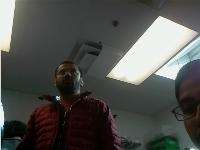

1
Captured 2020_2_27_14_49_35


In [17]:
# Display the button
print("Be sure to capture 3-5 images of your face")
button = widgets.Button(description="Capture Image!")
display(button)

# Call on_button_clicked function to print the message
button.on_click(on_button_clicked)

# Display the image
d1 = IPython.display.display("Your streaming will be displayed here", display_id=1)

### 8. Lets display the Train button
### Note: Only click on this button after you have captured 3-5 images by using the 'Capture Image!' button
### Keep running the code in the cells (except the last cell) and 
### Scroll up to this point to watch the streaming.

In [18]:
# Display the button
print("Note: Only click on this button after you have captured 3-5 images of your face")
trainButton = widgets.Button(description="Start Training")
display(trainButton)

# Call on_button_clicked function to print the message
trainButton.on_click(on_trainButton_clicked)

Note: Only click on this button after you have captured 3-5 images of your face


Button(description='Start Training', style=ButtonStyle())

9. Lets start the main loop and the timer call back.
  - Scroll up to see the live feed from camera
  - Click on the button to capture an image 
  - The picture will be stored in Desktop/me35Notebook/images folder 

In [19]:
# Add this to avoid "Maximum recursion depth error"
import sys
sys.setrecursionlimit(100000)
# Start the main loop using a thread 
p=threading.Thread(target=main_loop)
p.start()
# Start the timer callback 
callFunction()

### 10. Note: Don't run this right away. Scroll above to see the live stream and the button. 
  - Be sure to release the camera resource and stop the main_loop thread

In [20]:
# Note: Only run this if you are done otherwise scroll up to watch the live streaming
# Release the camera resource and clear the output
cam.release()
IPython.display.clear_output()
print ("Stream stopped")
#p.join()

Stream stopped


11. Yay! You've made it to the end of this tutorial. 
  - Please click on Kernel>Restart and Clear Output and Click on "Restart and Clear All Outputs" so that the next person going throught the tutorial can start fresh. Thanks.

12. Click [here](faceRecognitionAndStreaming.ipynb) to see the model in action. Will it recognize your face? 